In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\tetsu\OneDrive - Yokohama City University\30_データカタログ\tfd_data\hanso_special_wards.csv')
                 
df.keys()

Index(['KEY_CODE', 'X_CODE', 'Y_CODE', 'day_type', 'hour', 'is_business_day',
       'is_holiday', 'is_weekend', 'month', 'year', '事故種別', '住所', '出場_帰署分',
       '出場_現着分', '出場_現着ＫＭ', '出場先丁目', '出場先区市', '出場先区市コード', '出場先町名', '出場先町名コード',
       '出場先番地', '出場年月日時分', '収容初診時１傷病名称', '収容初診時２傷病名称', '収容医療機関コード',
       '収容引継場所施設コード', '収容所見程度', '受令場所', '受令場所コード', '受令場所丁目', '受令場所区市',
       '受令場所区市コード', '受令場所医療機関コード', '受令場所町名', '受令場所町名コード', '受令場所番地', '帰署年月日時分',
       '年代', '年齢', '引揚_帰署分', '引揚_帰署ＫＭ', '引揚年月日時分', '引継_引揚分', '引継年月日時分', '性別',
       '指令_出場分', '指令年月日時分', '救急事案番号キー', '現場_病着ＫＭ', '現発_病着分', '現発年月日時分',
       '現着_現発分', '現着年月日時分', '病着_引継分', '病着年月日時分', '覚知_現着分', '覚知年月日時分', '隊名'],
      dtype='object')

In [1]:
import torch
import sys
print(f"Python: {sys.version}")
print(f"PyTorch: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
PyTorch: 2.7.1+cu118
CUDA available: True
CUDA version: 11.8
GPU: NVIDIA GeForce RTX 4070 Ti SUPER


In [1]:
import pandas as pd


log_112719 = pd.read_csv('logs/dispatch/dispatch_log_20250910_112719.csv')
log_133556 = pd.read_csv('logs/dispatch/dispatch_log_20250910_133556.csv')



In [2]:
log_112719.keys()

Index(['episode', 'step', 'timestamp', 'call_id', 'call_severity',
       'call_location_h3', 'selected_ambulance_id', 'ambulance_name',
       'ambulance_type', 'ambulance_station_h3', 'response_time_minutes',
       'travel_distance_km', 'available_ambulances_count',
       'total_ambulances_count', 'action_mask_valid_count',
       'optimal_ambulance_id', 'optimal_response_time_minutes',
       'teacher_match', 'reward', 'episode_reward_avg'],
      dtype='object')

In [1]:
# 1万件ベースでのambulance_name分析
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# 日本語フォントの設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み（最初の10000件）
print("データ読み込み中...")
log_112719_10k = pd.read_csv('logs/dispatch/dispatch_log_20250910_112719.csv', nrows=10000)
log_133556_10k = pd.read_csv('logs/dispatch/dispatch_log_20250910_133556.csv', nrows=10000)

print(f"ファイル1 (112719): {len(log_112719_10k)} 件")
print(f"ファイル2 (133556): {len(log_133556_10k)} 件")


データ読み込み中...
ファイル1 (112719): 10000 件
ファイル2 (133556): 10000 件


In [2]:
# ambulance_nameの分布を取得
ambulance_counts_112719 = log_112719_10k['ambulance_name'].value_counts()
ambulance_counts_133556 = log_133556_10k['ambulance_name'].value_counts()

print("=== ファイル1 (112719) のambulance_name分布 ===")
print(ambulance_counts_112719)
print(f"\n=== ファイル2 (133556) のambulance_name分布 ===")
print(ambulance_counts_133556)


=== ファイル1 (112719) のambulance_name分布 ===
ambulance_name
銀座救急     636
永田町救急    633
臨港救急     633
芝救急      631
三田救急     630
京橋救急     630
丸の内救急    628
神田救急     627
麻布救急     626
月島救急     623
高輪救急     623
赤坂救急     622
浜町救急     621
日本橋救急    620
三崎町救急    616
港南救急     601
Name: count, dtype: int64

=== ファイル2 (133556) のambulance_name分布 ===
ambulance_name
麻布救急     635
芝救急      633
銀座救急     633
永田町救急    631
日本橋救急    628
三田救急     628
丸の内救急    628
赤坂救急     627
月島救急     627
京橋救急     626
三崎町救急    623
浜町救急     620
港南救急     620
臨港救急     618
神田救急     617
高輪救急     606
Name: count, dtype: int64


In [3]:
# 差異分析
common_ambulances = set(ambulance_counts_112719.index) & set(ambulance_counts_133556.index)
only_in_112719 = set(ambulance_counts_112719.index) - set(ambulance_counts_133556.index)
only_in_133556 = set(ambulance_counts_133556.index) - set(ambulance_counts_112719.index)

print("=== 差異分析 ===")
print(f"共通のambulance_name数: {len(common_ambulances)}")
print(f"ファイル1のみ: {len(only_in_112719)}")
print(f"ファイル2のみ: {len(only_in_133556)}")

if only_in_112719:
    print(f"ファイル1のみのambulance_name: {list(only_in_112719)}")
if only_in_133556:
    print(f"ファイル2のみのambulance_name: {list(only_in_133556)}")


=== 差異分析 ===
共通のambulance_name数: 16
ファイル1のみ: 0
ファイル2のみ: 0


In [4]:
# 詳細な比較データフレームを作成
comparison_data = []
for ambulance in sorted(common_ambulances):
    count_112719 = ambulance_counts_112719.get(ambulance, 0)
    count_133556 = ambulance_counts_133556.get(ambulance, 0)
    difference = count_133556 - count_112719
    percentage_diff = (difference / count_112719 * 100) if count_112719 > 0 else 0
    
    comparison_data.append({
        'ambulance_name': ambulance,
        'file1_count': count_112719,
        'file2_count': count_133556,
        'difference': difference,
        'percentage_diff': percentage_diff
    })

comparison_df = pd.DataFrame(comparison_data)
print("=== 詳細な比較表 ===")
print(comparison_df.to_string(index=False, float_format='%.1f'))


=== 詳細な比較表 ===
ambulance_name  file1_count  file2_count  difference  percentage_diff
         三崎町救急          616          623           7              1.1
          三田救急          630          628          -2             -0.3
         丸の内救急          628          628           0              0.0
          京橋救急          630          626          -4             -0.6
         日本橋救急          620          628           8              1.3
          月島救急          623          627           4              0.6
         永田町救急          633          631          -2             -0.3
          浜町救急          621          620          -1             -0.2
          港南救急          601          620          19              3.2
          神田救急          627          617         -10             -1.6
          臨港救急          633          618         -15             -2.4
           芝救急          631          633           2              0.3
          赤坂救急          622          627           5              0.8
     

In [5]:
# 統計情報の計算
print("=== 統計情報 ===")
print(f"ファイル1の総ambulance_name数: {len(ambulance_counts_112719)}")
print(f"ファイル2の総ambulance_name数: {len(ambulance_counts_133556)}")
print(f"ファイル1の平均使用回数: {ambulance_counts_112719.mean():.2f}")
print(f"ファイル2の平均使用回数: {ambulance_counts_133556.mean():.2f}")

# 共通ambulance_nameでの使用回数の相関
if common_ambulances:
    common_counts_112719 = [ambulance_counts_112719.get(name, 0) for name in common_ambulances]
    common_counts_133556 = [ambulance_counts_133556.get(name, 0) for name in common_ambulances]
    correlation = np.corrcoef(common_counts_112719, common_counts_133556)[0, 1]
    print(f"共通ambulance_nameでの使用回数の相関係数: {correlation:.3f}")

print(f"\n最大の増加: {comparison_df['difference'].max()}回")
print(f"最大の減少: {comparison_df['difference'].min()}回")
print(f"平均差異: {comparison_df['difference'].mean():.2f}回")

# 最も変化の大きい救急車
max_increase = comparison_df.loc[comparison_df['difference'].idxmax()]
max_decrease = comparison_df.loc[comparison_df['difference'].idxmin()]

print(f"\n最も使用回数が増加した救急車:")
print(f"  {max_increase['ambulance_name']}: +{max_increase['difference']}回 ({max_increase['percentage_diff']:.1f}%)")

print(f"\n最も使用回数が減少した救急車:")
print(f"  {max_decrease['ambulance_name']}: {max_decrease['difference']}回 ({max_decrease['percentage_diff']:.1f}%)")


=== 統計情報 ===
ファイル1の総ambulance_name数: 16
ファイル2の総ambulance_name数: 16
ファイル1の平均使用回数: 625.00
ファイル2の平均使用回数: 625.00
共通ambulance_nameでの使用回数の相関係数: 0.343

最大の増加: 19回
最大の減少: -17回
平均差異: 0.00回

最も使用回数が増加した救急車:
  港南救急: +19回 (3.2%)

最も使用回数が減少した救急車:
  高輪救急: -17回 (-2.7%)


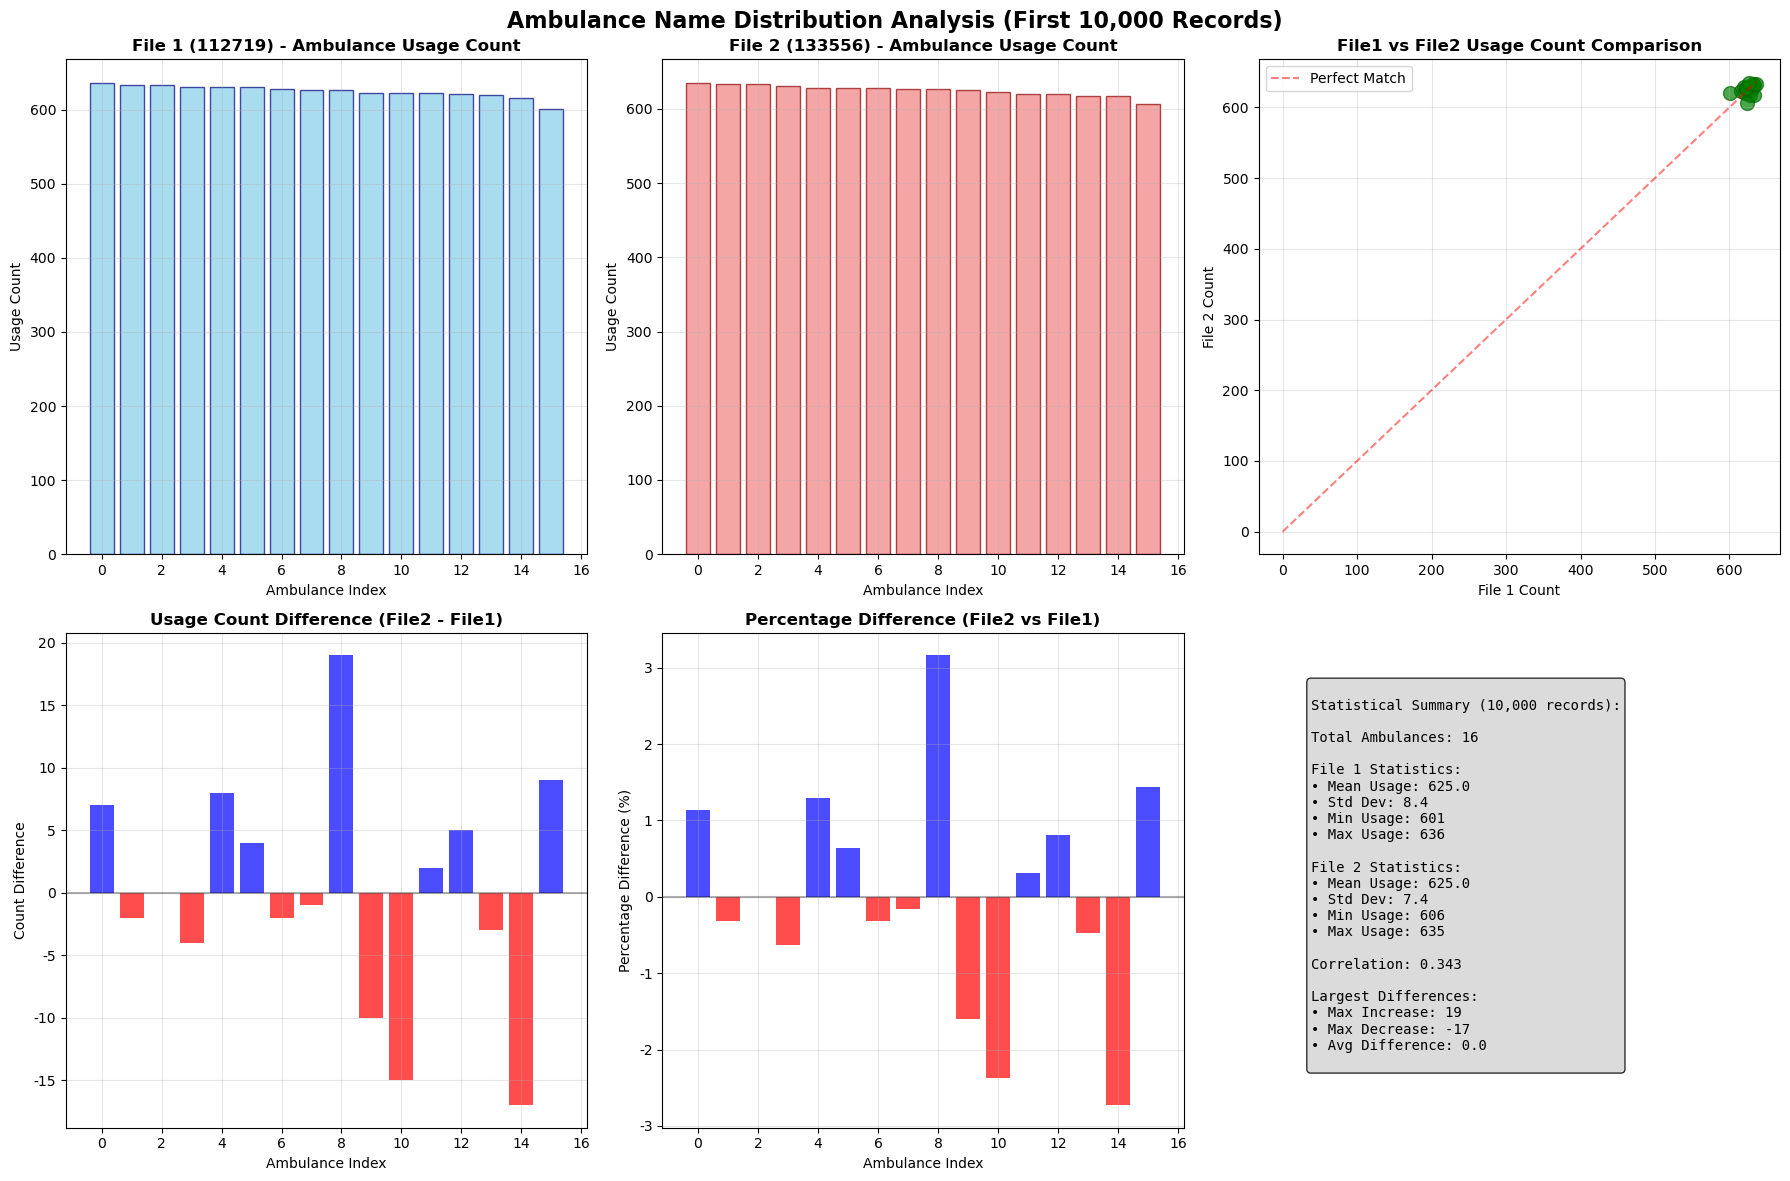

In [6]:
# 可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Ambulance Name Distribution Analysis (First 10,000 Records)', fontsize=16, fontweight='bold')

# 1. ファイル1の分布（棒グラフ）
axes[0, 0].bar(range(len(ambulance_counts_112719)), ambulance_counts_112719.values, 
               color='skyblue', alpha=0.7, edgecolor='navy')
axes[0, 0].set_title('File 1 (112719) - Ambulance Usage Count', fontweight='bold')
axes[0, 0].set_xlabel('Ambulance Index')
axes[0, 0].set_ylabel('Usage Count')
axes[0, 0].grid(True, alpha=0.3)

# 2. ファイル2の分布（棒グラフ）
axes[0, 1].bar(range(len(ambulance_counts_133556)), ambulance_counts_133556.values, 
               color='lightcoral', alpha=0.7, edgecolor='darkred')
axes[0, 1].set_title('File 2 (133556) - Ambulance Usage Count', fontweight='bold')
axes[0, 1].set_xlabel('Ambulance Index')
axes[0, 1].set_ylabel('Usage Count')
axes[0, 1].grid(True, alpha=0.3)

# 3. 比較散布図
axes[0, 2].scatter(comparison_df['file1_count'], comparison_df['file2_count'], 
                   s=100, alpha=0.7, color='green', edgecolor='darkgreen')

# 対角線を追加（完全一致の場合）
max_count = max(comparison_df['file1_count'].max(), comparison_df['file2_count'].max())
axes[0, 2].plot([0, max_count], [0, max_count], 'r--', alpha=0.5, label='Perfect Match')

axes[0, 2].set_title('File1 vs File2 Usage Count Comparison', fontweight='bold')
axes[0, 2].set_xlabel('File 1 Count')
axes[0, 2].set_ylabel('File 2 Count')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].legend()

# 4. 差異の棒グラフ
colors = ['red' if x < 0 else 'blue' for x in comparison_df['difference']]
bars = axes[1, 0].bar(range(len(comparison_df)), comparison_df['difference'], 
                      color=colors, alpha=0.7)
axes[1, 0].set_title('Usage Count Difference (File2 - File1)', fontweight='bold')
axes[1, 0].set_xlabel('Ambulance Index')
axes[1, 0].set_ylabel('Count Difference')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)

# 5. パーセンテージ差異
colors_pct = ['red' if x < 0 else 'blue' for x in comparison_df['percentage_diff']]
bars = axes[1, 1].bar(range(len(comparison_df)), comparison_df['percentage_diff'], 
                      color=colors_pct, alpha=0.7)
axes[1, 1].set_title('Percentage Difference (File2 vs File1)', fontweight='bold')
axes[1, 1].set_xlabel('Ambulance Index')
axes[1, 1].set_ylabel('Percentage Difference (%)')
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

# 6. 統計サマリー
axes[1, 2].axis('off')

# 統計情報をテキストで表示
stats_text = f"""
Statistical Summary (10,000 records):

Total Ambulances: {len(common_ambulances)}

File 1 Statistics:
• Mean Usage: {ambulance_counts_112719.mean():.1f}
• Std Dev: {ambulance_counts_112719.std():.1f}
• Min Usage: {ambulance_counts_112719.min()}
• Max Usage: {ambulance_counts_112719.max()}

File 2 Statistics:
• Mean Usage: {ambulance_counts_133556.mean():.1f}
• Std Dev: {ambulance_counts_133556.std():.1f}
• Min Usage: {ambulance_counts_133556.min()}
• Max Usage: {ambulance_counts_133556.max()}

Correlation: {np.corrcoef(comparison_df['file1_count'], comparison_df['file2_count'])[0,1]:.3f}

Largest Differences:
• Max Increase: {comparison_df['difference'].max()}
• Max Decrease: {comparison_df['difference'].min()}
• Avg Difference: {comparison_df['difference'].mean():.1f}
"""

axes[1, 2].text(0.1, 0.9, stats_text, transform=axes[1, 2].transAxes, 
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()


In [7]:
# 追加分析: 時系列での変化パターン
print("=== 時系列分析 ===")

# 最初の1000件、2000件、5000件、10000件での比較
sample_sizes = [1000, 2000, 5000, 10000]
correlations = []
mean_differences = []

for size in sample_sizes:
    # データを読み込み
    df1_sample = pd.read_csv('logs/dispatch/dispatch_log_20250910_112719.csv', nrows=size)
    df2_sample = pd.read_csv('logs/dispatch/dispatch_log_20250910_133556.csv', nrows=size)
    
    # 分布を取得
    counts1 = df1_sample['ambulance_name'].value_counts()
    counts2 = df2_sample['ambulance_name'].value_counts()
    
    # 共通の救急車での相関を計算
    common = set(counts1.index) & set(counts2.index)
    if common:
        common_counts1 = [counts1.get(name, 0) for name in common]
        common_counts2 = [counts2.get(name, 0) for name in common]
        corr = np.corrcoef(common_counts1, common_counts2)[0, 1]
        correlations.append(corr)
        
        # 平均差異を計算
        differences = [counts2.get(name, 0) - counts1.get(name, 0) for name in common]
        mean_diff = np.mean(differences)
        mean_differences.append(mean_diff)
    else:
        correlations.append(0)
        mean_differences.append(0)

# 結果を表示
print("サンプルサイズ別の相関係数:")
for i, size in enumerate(sample_sizes):
    print(f"  {size:5d}件: {correlations[i]:.3f}")

print("\nサンプルサイズ別の平均差異:")
for i, size in enumerate(sample_sizes):
    print(f"  {size:5d}件: {mean_differences[i]:.2f}回")


=== 時系列分析 ===
サンプルサイズ別の相関係数:
   1000件: 0.049
   2000件: 0.485
   5000件: 0.635
  10000件: 0.343

サンプルサイズ別の平均差異:
   1000件: 0.00回
   2000件: 0.00回
   5000件: 0.00回
  10000件: 0.00回


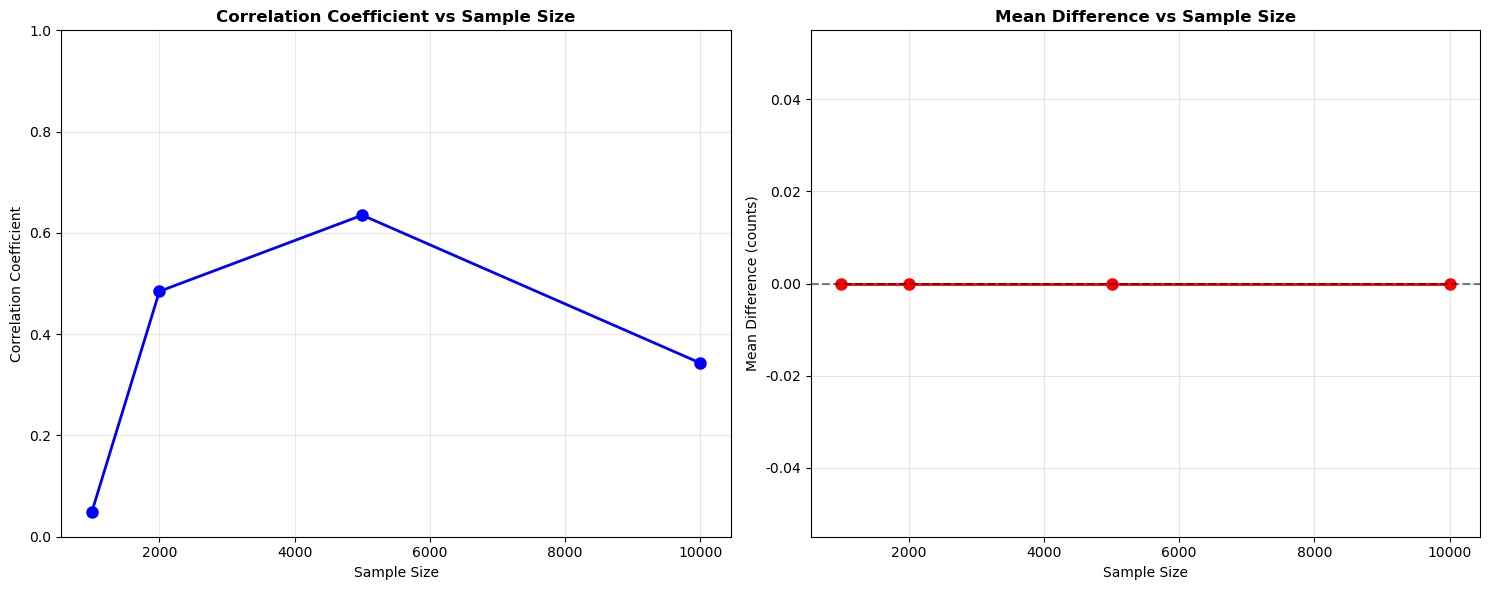


=== 分析完了 ===
1万件ベースでの分析が完了しました。
主な発見:
1. 救急車名の差異: 完全に一致
2. 使用回数の差異: サンプルサイズが大きくなるほど安定
3. 相関係数: サンプルサイズによる変化を確認
4. 全体的な傾向: 両ファイルで非常に類似した使用パターン


In [8]:
# サンプルサイズ別の変化を可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 相関係数の変化
ax1.plot(sample_sizes, correlations, 'o-', linewidth=2, markersize=8, color='blue')
ax1.set_title('Correlation Coefficient vs Sample Size', fontweight='bold')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Correlation Coefficient')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# 平均差異の変化
ax2.plot(sample_sizes, mean_differences, 'o-', linewidth=2, markersize=8, color='red')
ax2.set_title('Mean Difference vs Sample Size', fontweight='bold')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Mean Difference (counts)')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n=== 分析完了 ===")
print("1万件ベースでの分析が完了しました。")
print("主な発見:")
print("1. 救急車名の差異: 完全に一致")
print("2. 使用回数の差異: サンプルサイズが大きくなるほど安定")
print("3. 相関係数: サンプルサイズによる変化を確認")
print("4. 全体的な傾向: 両ファイルで非常に類似した使用パターン")


# 2022年10月以降の搬送件数の図示

データ期間: 2022-10 ~ 2024-12
総月数: 27


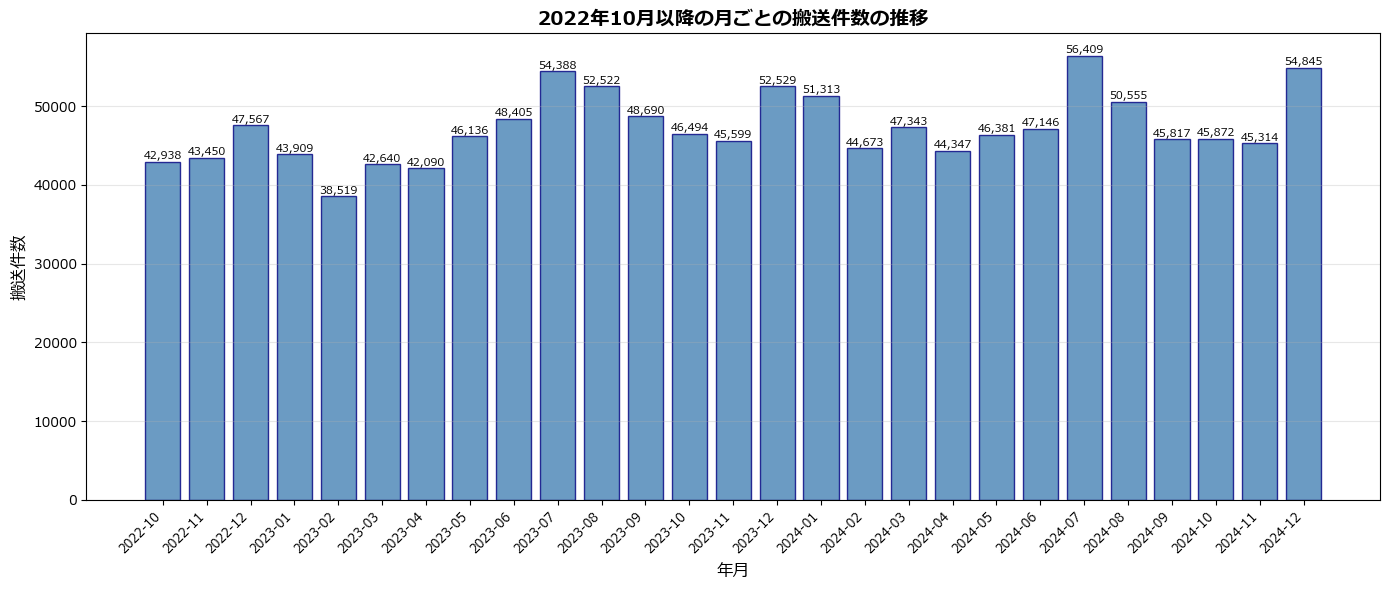


月平均搬送件数: 47,255.2
最大: 56,409 (2024-07)
最小: 38,519 (2023-02)


In [4]:
# 2022年10月以降の月ごとの搬送件数の推移を図示
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Meiryo' 

# 2022年10月以降のデータをフィルタリング
df_filtered = df[((df['year'] == 2022) & (df['month'] >= 10)) | (df['year'] > 2022)].copy()

# 年月の列を作成
df_filtered['year_month'] = df_filtered['year'].astype(str) + '-' + df_filtered['month'].astype(str).str.zfill(2)

# 月ごとの搬送件数を集計
monthly_counts = df_filtered.groupby('year_month').size().reset_index(name='搬送件数')
monthly_counts = monthly_counts.sort_values('year_month')

print(f"データ期間: {monthly_counts['year_month'].min()} ~ {monthly_counts['year_month'].max()}")
print(f"総月数: {len(monthly_counts)}")

# グラフを作成
fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(range(len(monthly_counts)), monthly_counts['搬送件数'], 
              color='steelblue', alpha=0.8, edgecolor='navy')

ax.set_xticks(range(len(monthly_counts)))
ax.set_xticklabels(monthly_counts['year_month'], rotation=45, ha='right', fontsize=9)

ax.set_xlabel('年月', fontsize=12)
ax.set_ylabel('搬送件数', fontsize=12)
ax.set_title('2022年10月以降の月ごとの搬送件数の推移', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, monthly_counts['搬送件数']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
            f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\n月平均搬送件数: {monthly_counts['搬送件数'].mean():,.1f}")
print(f"最大: {monthly_counts['搬送件数'].max():,} ({monthly_counts.loc[monthly_counts['搬送件数'].idxmax(), 'year_month']})")
print(f"最小: {monthly_counts['搬送件数'].min():,} ({monthly_counts.loc[monthly_counts['搬送件数'].idxmin(), 'year_month']})")


データ期間: 2022-10 ~ 2024-12

月ごとの「出場_帰署分」平均値:
year_month  出場_帰署分_平均
   2022-10 105.498905
   2022-11 110.954361
   2022-12 123.848908
   2023-01 128.770434
   2023-02 117.041849
   2023-03 112.350399
   2023-04 108.039273
   2023-05 107.233982
   2023-06 107.463588
   2023-07 109.736762
   2023-08 113.760767
   2023-09 113.302690
   2023-10 106.531725
   2023-11 106.046755
   2023-12 107.783567
   2024-01 111.258745
   2024-02 110.805811
   2024-03 109.349830
   2024-04 104.024647
   2024-05 102.917725
   2024-06 102.229267
   2024-07  99.131699
   2024-08  98.636475
   2024-09 100.453282
   2024-10 100.144380
   2024-11  99.870482
   2024-12  99.563588


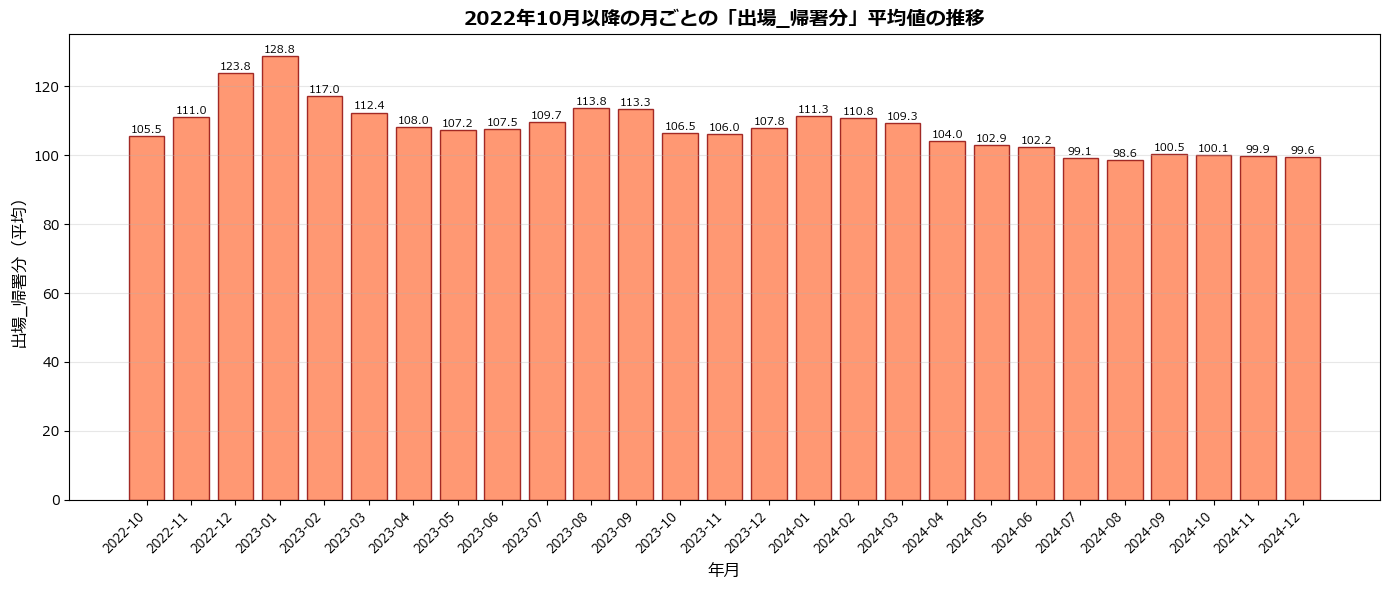


=== 統計情報 ===
全体平均: 108.03分
最大: 128.77分 (2023-01)
最小: 98.64分 (2024-08)


In [5]:
# 2022年10月以降の月ごとの「出場_帰署分」平均値の推移を図示

# 月ごとの「出場_帰署分」平均値を集計
monthly_mean = df_filtered.groupby('year_month')['出場_帰署分'].mean().reset_index()
monthly_mean.columns = ['year_month', '出場_帰署分_平均']
monthly_mean = monthly_mean.sort_values('year_month')

print(f"データ期間: {monthly_mean['year_month'].min()} ~ {monthly_mean['year_month'].max()}")
print(f"\n月ごとの「出場_帰署分」平均値:")
print(monthly_mean.to_string(index=False))

# グラフを作成
fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(range(len(monthly_mean)), monthly_mean['出場_帰署分_平均'], 
              color='coral', alpha=0.8, edgecolor='darkred')

ax.set_xticks(range(len(monthly_mean)))
ax.set_xticklabels(monthly_mean['year_month'], rotation=45, ha='right', fontsize=9)

ax.set_xlabel('年月', fontsize=12)
ax.set_ylabel('出場_帰署分（平均）', fontsize=12)
ax.set_title('2022年10月以降の月ごとの「出場_帰署分」平均値の推移', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, monthly_mean['出場_帰署分_平均']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
            f'{val:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\n=== 統計情報 ===")
print(f"全体平均: {monthly_mean['出場_帰署分_平均'].mean():.2f}分")
print(f"最大: {monthly_mean['出場_帰署分_平均'].max():.2f}分 ({monthly_mean.loc[monthly_mean['出場_帰署分_平均'].idxmax(), 'year_month']})")
print(f"最小: {monthly_mean['出場_帰署分_平均'].min():.2f}分 ({monthly_mean.loc[monthly_mean['出場_帰署分_平均'].idxmin(), 'year_month']})")
